In [1]:
from __future__ import print_function
import os
import sys
sys.path.append('../')
%matplotlib inline

In [2]:
import local_env
import utils.service as us
import utils.viewer as uv
reload(us)
reload(uv)
from utils.service import ClusterService
from utils.viewer import ClusterViewer

---
#### ENV VARS

In [3]:
None==os.environ.get('csv_bucket')

True

In [4]:
local_env.export()


EXPORTING dev ENV:
	width: 5
	iterations: 25
	csv_bucket: gfw-clusters-test
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




In [5]:
os.environ.get('csv_bucket')

'gfw-clusters-test'

---
### ClusterService

In [8]:
bounds_brazil_dev=[[-57.3321533203125,-3.8094460989409646],[-56.1895751953125,-3.162455530237848]]         

In [9]:
c_w5=ClusterService(bounds=bounds_brazil_dev)
%time c_w5.run()
print('NB ERRORS:',c_w5.errors().shape[0])
print('NB CLUSTERS:',c_w5.dataframe().shape[0])

CPU times: user 3.29 s, sys: 601 ms, total: 3.89 s
Wall time: 1min 44s
NB ERRORS: 0
NB CLUSTERS: 727


In [10]:
c_w15=ClusterService(bounds=bounds_brazil_dev,width=15)
%time c_w15.run()
print('NB ERRORS:',c_w15.errors().shape[0])
print('NB CLUSTERS:',c_w15.dataframe().shape[0])

CPU times: user 3.38 s, sys: 682 ms, total: 4.06 s
Wall time: 2min 2s
NB ERRORS: 0
NB CLUSTERS: 271


In [11]:
c_w5.dataframe().head()

,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
0,95,573,20150626,20171122,-3.517205,-56.850758,1401,2088,20180208::07:48:15
1,51,87,20160129,20171029,-3.324190,-56.866958,1400,2085,20180208::07:48:15
2,47,471,20150829,20171105,-3.290813,-57.078929,1398,2085,20180208::07:48:15
3,143,753,20150618,20171028,-3.317309,-57.074104,1398,2085,20180208::07:48:15
4,25,91,20150721,20171215,-3.778279,-56.899701,1400,2091,20180208::07:48:15


In [75]:
# get random w5 row
row_w5=c_w5.dataframe().sample()
row_id_w5=row_w5.index.values[0]
row_w5

,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
258,122,342,20150610,20171223,-3.774496,-57.226103,1396,2090,20180208::07:48:14


In [76]:
# get random w15 row on the same tile as w5 row
row_w15=c_w15.dataframe()[(c_w15.dataframe().x==int(row_w5.x)) & (c_w15.dataframe().y==int(row_w5.y)) ].sample()
row_id_w15=row_w15.index.values[0]
row_w15

,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
187,77,2155,20150509,20171223,-3.731161,-57.223001,1396,2090,20180208::07:49:58


In [77]:
print("NB CLUSTERS FOR WIDTH = 5:",c_w5.tile(row_id_w5).shape[0])
c_w5.tile(row_id_w5).head()

NB CLUSTERS FOR WIDTH = 5: 31


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
251,72,476,20150602,20171012,-3.696078,-57.218865,1396,2090,20180208::07:48:14
253,83,295,20151016,20171223,-3.770025,-57.219554,1396,2090,20180208::07:48:14
254,28,69,20150509,20171028,-3.738383,-57.219554,1396,2090,20180208::07:48:14
255,56,191,20150509,20171028,-3.714995,-57.222656,1396,2090,20180208::07:48:14
256,43,269,20150805,20171223,-3.730473,-57.225758,1396,2090,20180208::07:48:14


In [78]:
print("NB CLUSTERS FOR WIDTH = 15:",c_w15.tile(row_id_w15).shape[0])
c_w15.tile(row_id_w15).head()

NB CLUSTERS FOR WIDTH = 15: 6


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
187,77,2155,20150509,20171223,-3.731161,-57.223001,1396,2090,20180208::07:49:58
208,923,4495,20150525,20171105,-3.765898,-57.270910,1396,2090,20180208::07:49:58
209,463,5530,20150728,20171223,-3.717403,-57.267119,1396,2090,20180208::07:49:58
210,981,10164,20150602,20171105,-3.743886,-57.255055,1396,2090,20180208::07:49:58
211,728,5754,20150509,20171223,-3.767961,-57.233341,1396,2090,20180208::07:49:58


In [79]:
view5=ClusterViewer(c_w5)
view15=ClusterViewer(c_w15)

WIDTH = 5
NB CLUSTERS: 31
TOTAL COUNT: 3435
TOTAL AREA: 13036
DATES: 2015-05-09 to 2017-12-23


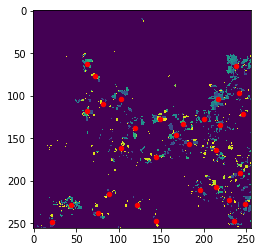

In [80]:
print("WIDTH = 5")
view5.input(row_id_w5)

WIDTH = 15
NB CLUSTERS: 6
TOTAL COUNT: 3512
TOTAL AREA: 32074
DATES: 2015-05-09 to 2017-12-23


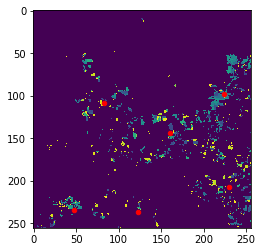

In [81]:
print("WIDTH = 15")
view15.input(row_id_w15)